In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from importlib import reload
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from graph import *
from evaluation import *
from sklearn.cluster import DBSCAN
from pca import *

In [2]:
df = load_data()

# StockID RFM model analysis

## 1.  Categorical level RFM with Kmeans++

Clusters = 2 ,Silhouette Score = 0.23157
Clusters = 3 ,Silhouette Score = 0.20039
Clusters = 4 ,Silhouette Score = 0.19882
Clusters = 5 ,Silhouette Score = 0.19936
Clusters = 6 ,Silhouette Score = 0.19622
Clusters = 7 ,Silhouette Score = 0.1917
Clusters = 8 ,Silhouette Score = 0.18413
Clusters = 9 ,Silhouette Score = 0.17821
Clusters = 10 ,Silhouette Score = 0.15675
Clusters = 11 ,Silhouette Score = 0.15809
Clusters = 12 ,Silhouette Score = 0.16097
Clusters = 13 ,Silhouette Score = 0.163
Clusters = 14 ,Silhouette Score = 0.16338


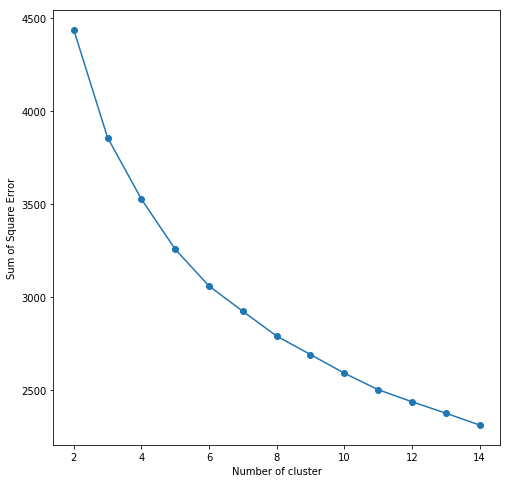

In [3]:
stock_rfm_ori = rfm(df,model_type='StockID')
stock_rfm_trans = rfm_transform(stock_rfm_ori)
matrix_trans = rfm_matrix(stock_rfm_trans, model_type=1)
sse, sscore, test_range = kmeans(matrix_trans)
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

0.5750952144658978
0.211426078563764
0.1707431957209955
0.12369589418593012
0.005632477967471877
0.017407214181035875
0.03387710960821578
0.04453096150202328
0.0973531085069651
0.06273212433361264
0.07395116394203602
0.08502411334168423
0.08288178013134667
[0.36298486 0.13344654]


/Users/waynechen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


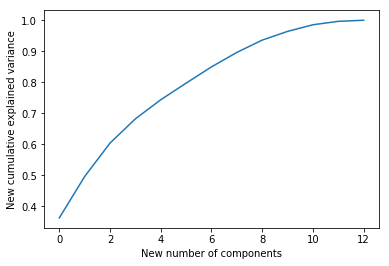

In [4]:
pca_test(stock_rfm_trans)

In [5]:
clusters_trans = kmeans(matrix = matrix_trans, cluster_num = 5)
kmeans_cate = stock_rfm_ori.copy()
kmeans_cate = rfm_write_back(kmeans_cate,clusters_trans) 
display(kmeans_cate.head(5))

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9,Cluster
0,17850,34,372,5391.21,118.8,2370.11,101.76,0.00,0.0,0.0,413.58,2386.96,0.0,3
1,13047,9,56,3232.59,21.0,2623.36,0.00,239.55,0.0,0.0,0.00,348.68,0.0,4
2,12583,15,2,6705.38,68.0,6561.54,60.84,0.00,0.0,0.0,0.00,15.00,0.0,1
3,13748,5,95,948.25,0.0,933.25,0.00,0.00,0.0,0.0,0.00,15.00,0.0,4
4,15100,3,333,876.00,0.0,876.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,3


## 2. Normalized continuous data RFM with Kmeans++

Clusters = 2 ,Silhouette Score = 0.70319
Clusters = 3 ,Silhouette Score = 0.61544
Clusters = 4 ,Silhouette Score = 0.51149
Clusters = 5 ,Silhouette Score = 0.53187
Clusters = 6 ,Silhouette Score = 0.51576
Clusters = 7 ,Silhouette Score = 0.48359
Clusters = 8 ,Silhouette Score = 0.47565
Clusters = 9 ,Silhouette Score = 0.48983
Clusters = 10 ,Silhouette Score = 0.4915
Clusters = 11 ,Silhouette Score = 0.48028
Clusters = 12 ,Silhouette Score = 0.41528
Clusters = 13 ,Silhouette Score = 0.39831
Clusters = 14 ,Silhouette Score = 0.4346


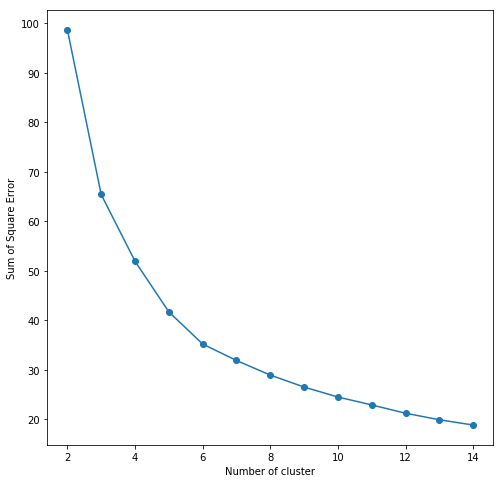

In [6]:
stock_rfm_norm = norm(stock_rfm_ori.iloc[:,1:])
matrix_norm = rfm_matrix(stock_rfm_norm, model_type=1)
sse, sscore, test_range = kmeans(matrix_norm)
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

0.07220429071147946
0.004744424066770616
0.0015014660877267977
0.000890309692661461
0.0006510513497152415
0.0006129626934786839
0.0005760108927095998
0.0004352509982310205
0.00015876990823382954
0.00032549706222829164
0.00024477257637564186
4.990315615660404e-19
[0.87685301 0.05761656]


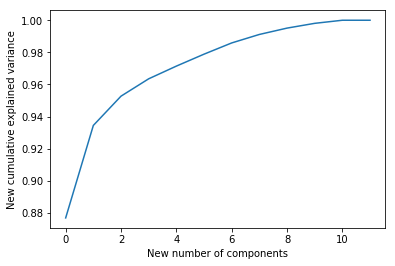

In [7]:
pca_test(stock_rfm_norm)

In [8]:
clusters_norm = kmeans(matrix = matrix_norm, cluster_num = 5)
kmeans_norm = stock_rfm_ori.copy()
kmeans_norm = rfm_write_back(kmeans_norm,clusters_norm)   
display(kmeans_norm.head(5))

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9,Cluster
0,17850,34,372,5391.21,118.8,2370.11,101.76,0.00,0.0,0.0,413.58,2386.96,0.0,4
1,13047,9,56,3232.59,21.0,2623.36,0.00,239.55,0.0,0.0,0.00,348.68,0.0,3
2,12583,15,2,6705.38,68.0,6561.54,60.84,0.00,0.0,0.0,0.00,15.00,0.0,2
3,13748,5,95,948.25,0.0,933.25,0.00,0.00,0.0,0.0,0.00,15.00,0.0,3
4,15100,3,333,876.00,0.0,876.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,4


## 3. Categorical level RFM with DBSCAN

In [36]:
#X_trans = rfm_matrix(stock_rfm_trans, model_type=1)
X_trans = stock_rfm_trans.iloc[:,1:]

In [37]:
# decide the eps by distance mean value
from sklearn.neighbors import NearestNeighbors
X_distance = X_trans
nbrs = NearestNeighbors(n_neighbors=len(X_distance)).fit(X_distance)
distances, indices = nbrs.kneighbors(X_distance)
distances.mean()

6.7079146844580455

In [38]:
db = DBSCAN(eps= 2.5, min_samples=13).fit(X_trans)
labels_trans = db.labels_
dbscan_cate = stock_rfm_ori.copy()
dbscan_cate = rfm_write_back(dbscan_cate,labels_trans) 
display(dbscan_cate.head(5))
n_clusters_trans = len(set(labels_trans)) - (1 if -1 in labels_trans else 0)
print(n_clusters_trans)
X_trans['DBcluster'] = labels_trans
X_trans.groupby("DBcluster", as_index = False).count()

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9,Cluster
0,17850,34,372,5391.21,118.8,2370.11,101.76,0.00,0.0,0.0,413.58,2386.96,0.0,-1
1,13047,9,56,3232.59,21.0,2623.36,0.00,239.55,0.0,0.0,0.00,348.68,0.0,0
2,12583,15,2,6705.38,68.0,6561.54,60.84,0.00,0.0,0.0,0.00,15.00,0.0,0
3,13748,5,95,948.25,0.0,933.25,0.00,0.00,0.0,0.0,0.00,15.00,0.0,0
4,15100,3,333,876.00,0.0,876.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,-1


4


,DBcluster,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9
0,-1,523,523,523,523,523,523,523,523,523,523,523,523
1,0,3704,3704,3704,3704,3704,3704,3704,3704,3704,3704,3704,3704
2,1,47,47,47,47,47,47,47,47,47,47,47,47
3,2,37,37,37,37,37,37,37,37,37,37,37,37
4,3,11,11,11,11,11,11,11,11,11,11,11,11


## 4. Normalized continuous data RFM with DBSCAN

In [116]:
X_norm = norm(stock_rfm_ori.iloc[:,1:])

In [117]:
# decide the eps by distance mean value
from sklearn.neighbors import NearestNeighbors
X_distance = X_norm.values
nbrs = NearestNeighbors(n_neighbors=len(X_distance)).fit(X_distance)
distances, indices = nbrs.kneighbors(X_distance)
distances.mean()

0.3049485531949109

In [128]:
db = DBSCAN(eps=0.74, min_samples=13).fit(X_norm)
labels_norm = db.labels_
dbscan_norm = stock_rfm_ori.copy()
dbscan_norm = rfm_write_back(dbscan_norm,labels_norm) 
display(dbscan_norm.head(5))
n_clusters_norm = len(set(labels_norm)) - (1 if -1 in labels_norm else 0)
print(n_clusters_norm)
X_norm['DBcluster'] = labels_norm
X_norm.groupby("DBcluster", as_index = False).count()

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9,Cluster
0,17850,34,372,5391.21,118.8,2370.11,101.76,0.00,0.0,0.0,413.58,2386.96,0.0,1
1,13047,9,56,3232.59,21.0,2623.36,0.00,239.55,0.0,0.0,0.00,348.68,0.0,0
2,12583,15,2,6705.38,68.0,6561.54,60.84,0.00,0.0,0.0,0.00,15.00,0.0,0
3,13748,5,95,948.25,0.0,933.25,0.00,0.00,0.0,0.0,0.00,15.00,0.0,0
4,15100,3,333,876.00,0.0,876.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0


2


,DBcluster,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9
0,-1,8,8,8,8,8,8,8,8,8,8,8,8
1,0,4255,4255,4255,4255,4255,4255,4255,4255,4255,4255,4255,4255
2,1,59,59,59,59,59,59,59,59,59,59,59,59


## 5. Compute the score with results of the clusters above

In [129]:
result = get_score(matrix_trans,clusters_trans,'Categorical  StockID RFM Kmeans++')
result = get_score(matrix_norm,clusters_norm,'Norm StockID RFM Kmeans++',result,flag=1)
matrix_trans = X_trans.values
result = get_score(matrix_trans,labels_trans,'Categorical StockID RFM DBSCAN',result,flag=1)
matrix_norm = X_norm.values
result = get_score(matrix_norm,labels_norm,'Norm StockID RFM DBSCAN',result,flag=1)
print(result)

/Users/waynechen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/waynechen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/waynechen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/waynechen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


                               Model Silhouette Coefficient  \
0  Categorical  StockID RFM Kmeans++                0.20229   
1          Norm StockID RFM Kmeans++                0.50672   
2     Categorical StockID RFM DBSCAN               -0.10544   
3            Norm StockID RFM DBSCAN                0.75713   

  Calinski-Harabaz Index Davies-Bouldin Index  
0              963.47383              1.73875  
1                 6101.4               0.9029  
2                30.8296              3.62853  
3                506.568              0.88548  


## 6. Identify Segementation 

# Visualization of the results from categorical level RFM with Kmeans++

In [24]:
n_attributes = len(kmeans_cate.columns) - 5
customer_clustering = df_for_chart(kmeans_cate, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_6 std,cate_7,cate_7 mean,cate_7 std,cate_8,cate_8 mean,cate_8 std,cate_9,cate_9 mean,cate_9 std
Cluster,,,,,,,,,,,,,,,,,,,,,
3,1417636.24,589.700,623,2,300.920000,0.841494,19.148186,101.872038,83.461498,1899.166035,...,100.859624,2.153831,49.010417,366.638330,10.338583,235.254414,1183.151891,0.210360,4.786742,43.422364
4,1682121.62,696.575,858,2,275.804444,0.968001,18.977809,119.094259,77.938155,1527.988986,...,4.829463,1.366511,26.790653,130.717549,13.427725,263.252517,1241.495073,0.226440,4.439394,37.004908
1,1447310.71,844.275,574,3,281.971429,1.103733,27.830052,111.156713,80.799819,2037.324808,...,1.171637,1.561397,39.369808,221.142951,11.751245,296.301446,897.653814,0.170502,4.299111,33.516837
2,2238182.03,808.440,1047,3,294.400000,1.244373,26.601089,168.297301,81.505300,1742.346676,...,1.573778,2.037401,43.553725,427.097211,11.575856,247.458185,659.966381,0.226628,4.844642,43.153028
0,1338710.05,534.275,1220,2,279.143750,1.456985,15.987541,83.001795,80.769279,886.283984,...,14.421022,1.466244,16.089139,64.287315,12.347229,135.486549,569.876215,0.317034,3.478828,29.465292


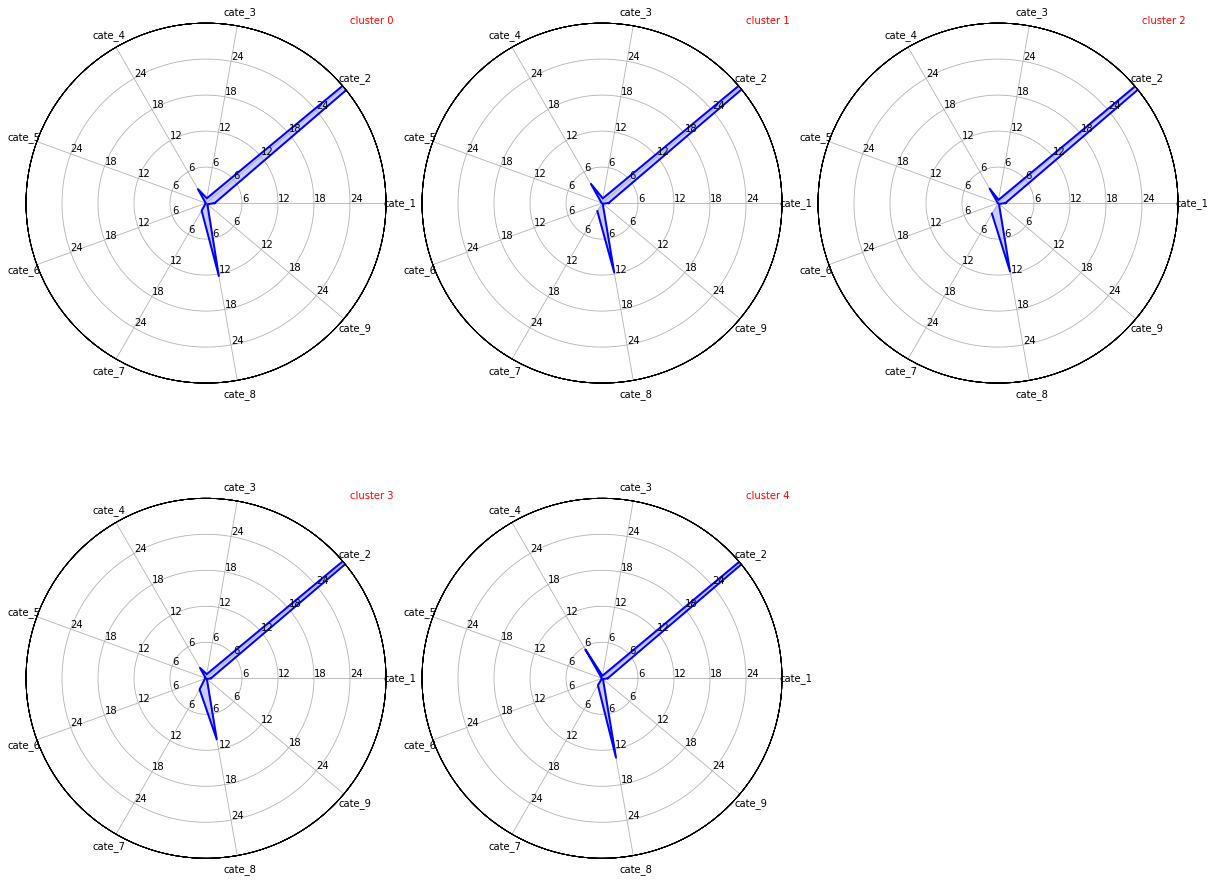

In [25]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

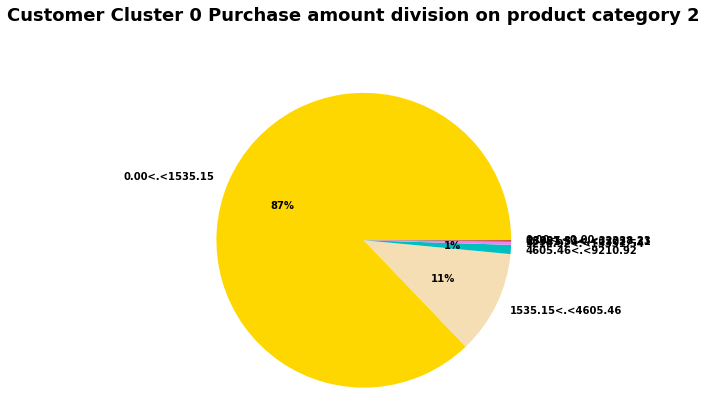

In [133]:
#for i in range(n_clusters):
    #for j in range(1, n_attributes+1):
        #pie_chart(kmeans_cate, i, j)
pie_chart(kmeans_cate, 0, 2)

# Visualization of the results from normalized continuous data RFM with Kmeans++

In [27]:
n_attributes = len(kmeans_norm.columns) - 5
customer_clustering = df_for_chart(kmeans_norm, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_6 std,cate_7,cate_7 mean,cate_7 std,cate_8,cate_8 mean,cate_8 std,cate_9,cate_9 mean,cate_9 std
Cluster,,,,,,,,,,,,,,,,,,,,,
4,196596.36,264.70,497,1,224.910000,1.323855,5.236720,19.223764,77.814421,307.807485,...,1.059211,2.335501,9.238451,49.346028,13.279925,52.530885,145.063739,0.450237,1.780986,14.830875
3,1005953.09,627.77,1010,2,308.825500,1.202205,11.973881,51.792601,81.029779,807.051059,...,4.452794,1.326236,13.209218,55.040759,11.989074,119.410356,212.308189,0.232600,2.316683,23.871232
2,4993582.95,1097.98,2199,4,298.376667,1.166873,26.497849,134.019175,81.990480,1861.874779,...,53.337848,1.712527,38.888795,225.056231,11.272422,255.978963,545.969450,0.207920,4.721528,33.889804
0,1556517.88,58762.08,19,49,1296.188163,0.822088,673.470526,779.837740,77.871436,63793.832632,...,69.358450,2.040964,1671.998421,2852.160048,13.683514,11209.807368,4801.049804,0.210642,172.562105,316.876588
1,371310.37,340.93,597,1,233.212500,1.557158,9.684908,50.150865,79.360970,493.593819,...,20.508262,1.651015,10.268660,38.267507,11.929942,74.199514,258.975595,0.454881,2.829179,23.851295


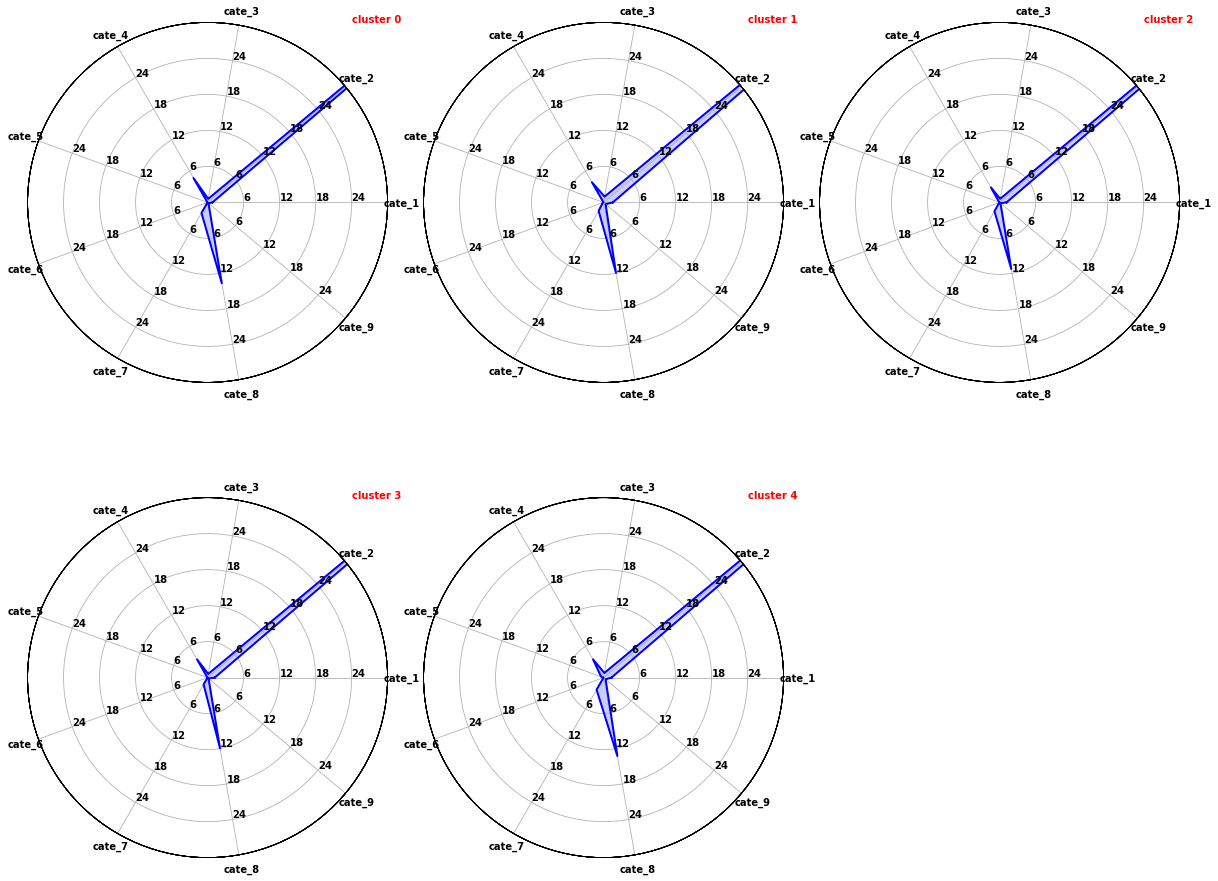

In [28]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

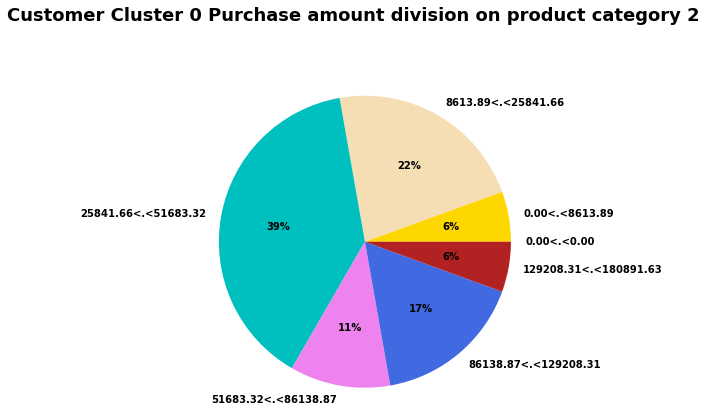

In [134]:
#for i in range(n_clusters):
    #for j in range(1, n_attributes+1):
        #pie_chart(kmeans_norm, i, j)
pie_chart(kmeans_norm, 0, 2)

# Visualization of the results from categorical level RFM with DBSCAN

In [30]:
n_attributes = len(dbscan_cate.columns) - 5
temp_cate = dbscan_cate[dbscan_cate['Cluster']!=-1]
customer_clustering = df_for_chart(temp_cate, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_6 std,cate_7,cate_7 mean,cate_7 std,cate_8,cate_8 mean,cate_8 std,cate_9,cate_9 mean,cate_9 std
Cluster,,,,,,,,,,,,,,,,,,,,,
0,21605.25,858.35,20,4,276.755,0.901633,9.740000,33.205798,77.252242,834.527000,...,0.0,0.810220,8.752500,29.507726,14.670879,158.484000,232.836078,0.000000,0.000000,0.000000
1,14774.50,508.80,19,2,259.135,0.610444,4.746842,11.628387,82.449761,641.133684,...,0.0,1.342854,10.442105,29.805851,13.043961,101.430526,235.832889,0.219703,1.708421,6.152125


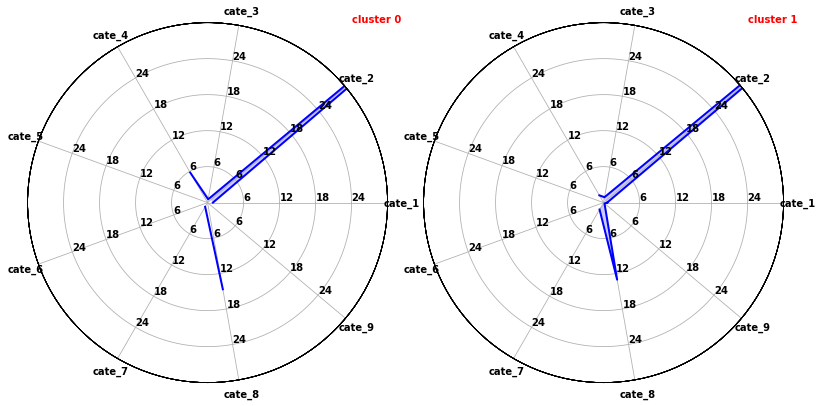

In [31]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

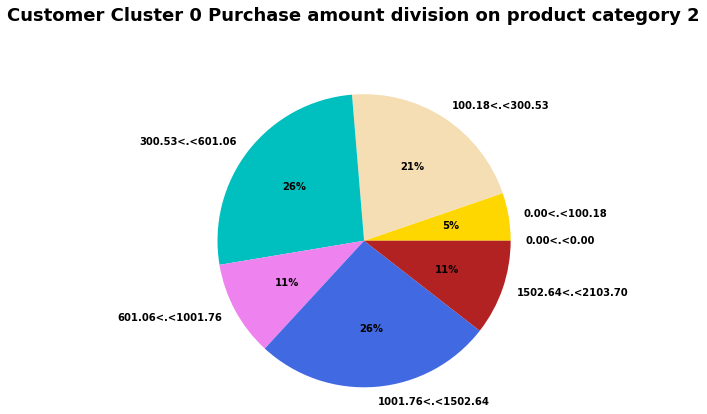

In [135]:
#for i in range(n_clusters):
    #for j in range(1, n_attributes+1):
        #pie_chart(temp_cate, i, j)
pie_chart(temp_cate, 0, 2)

 # Visualization of the results from normalized continuous data RFM with DBSCAN

In [130]:
n_attributes = len(dbscan_norm.columns) - 5
temp_norm = dbscan_norm[dbscan_norm['Cluster']!=-1]
customer_clustering = df_for_chart(temp_norm, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_6 std,cate_7,cate_7 mean,cate_7 std,cate_8,cate_8 mean,cate_8 std,cate_9,cate_9 mean,cate_9 std
Cluster,,,,,,,,,,,,,,,,,,,,,
1,1490106.96,12165.98,59,17,678.712609,1.828108,461.707797,786.683794,75.591883,19091.523898,...,75.430770,3.649450,921.706949,2034.055203,14.613795,3690.867288,4461.119259,0.325630,82.241186,187.424965
0,5859325.07,646.76,4255,2,283.590000,1.041024,14.335368,53.139365,82.339646,1133.853704,...,2.689546,1.398139,19.252999,74.085364,11.431283,157.413868,320.179693,0.188887,2.601065,17.513221


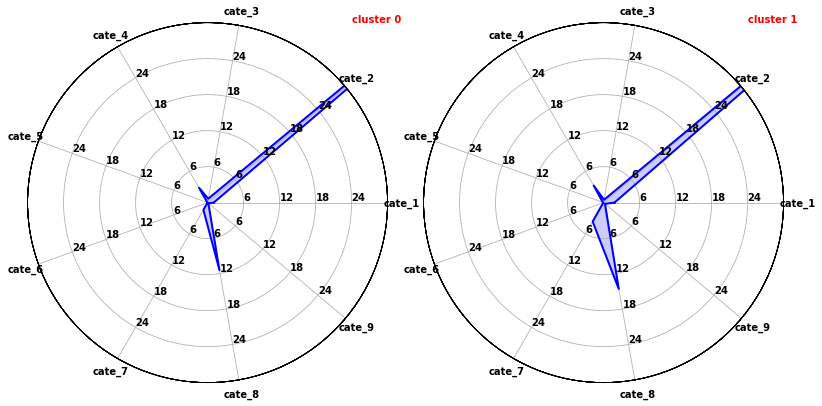

In [131]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

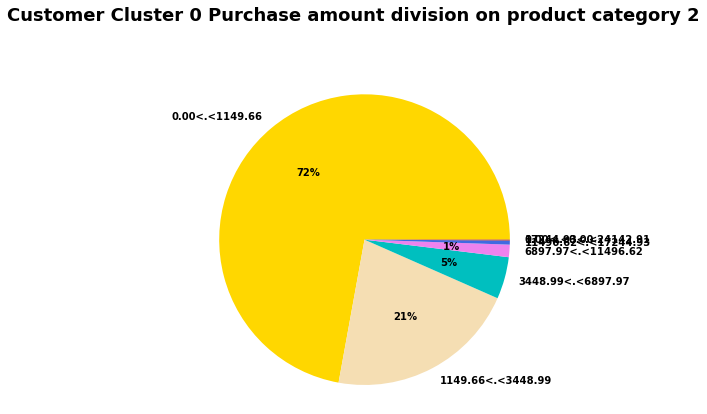

In [136]:
#for i in range(n_clusters):
    #for j in range(1, n_attributes+1):
        #pie_chart(temp_norm, i, j)
pie_chart(temp_norm, 0, 2)